In [ ]:
# MIT License

# Copyright (c) 2021 GDSC UNI

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

<table align="center">
  <td align="center"><a target="_blank" href="https://gdsc.community.dev/universidad-nacional-de-ingenieria/">
        <img src="https://i.ibb.co/pX2w52P/GDSC.png" style="padding-bottom:5px;" />
      View GDSC UNI</a></td>

  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1N17_1BlKC5XH3YbzM-dwu9ngcoshXTA6?usp=sharing">
        <img src="https://i.ibb.co/Bf0HK0q/Colaboratory.png"  style="padding-bottom:5px;" />Run in Google Colab </a></td>

  <td align="center"><a target="_blank" href="https://github.com/GDSC-UNI/Pandas-For-Data-Science/blob/main/PFDS_10_Ejemplo_de_aplicaci%C3%B3n.ipynb">
        <img src="https://i.ibb.co/VHHdRx2/Github.png"  height="110px" style="padding-bottom:5px;"/>View source on GitHub</a></td>
</table>

<h1></h1>

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:#000080">PFDS10:</span> Pivot y Data Visualization</h1>
<hr>

En este Notebook exploramos un nuevo método del DataFrame, pivot que nos permite crear tablas dinámicas que se almacenan en objetos multiIndex así como también realizaremos algunas gráficas de nuestros datos. Para esto, utilizaremos el dataset tip de seaborn al cual le haremos algunas modificaciones con los conceptos aprendidos en notebooks anteriores.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.options.display.float_format='{:,.3f}'.format

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [ ]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000


In [ ]:
tips['prct_tip'] = tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.990,1.010,Female,No,Sun,Dinner,2,0.059
1,10.340,1.660,Male,No,Sun,Dinner,3,0.161
2,21.010,3.500,Male,No,Sun,Dinner,3,0.167
3,23.680,3.310,Male,No,Sun,Dinner,2,0.140
4,24.590,3.610,Female,No,Sun,Dinner,4,0.147


Un método que nos puede ser de utilidad al momento de hacer nuestro análisis es *cut* el cual agrupa valores en intervalos discretos. Incluso podemos utilizar este método para hacer la conversión de variables continuas a categóricas en base a rangos.

<code>pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)</code>

El criterio de clasificación de nuestros datos viene determinado por el parámetro bins.


In [ ]:
tips['bin_total'] = pd.cut(tips['total_bill'], bins=3)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,prct_tip,bin_total
0,16.990,1.010,Female,No,Sun,Dinner,2,0.059,"(3.022, 18.983]"
1,10.340,1.660,Male,No,Sun,Dinner,3,0.161,"(3.022, 18.983]"
2,21.010,3.500,Male,No,Sun,Dinner,3,0.167,"(18.983, 34.897]"
3,23.680,3.310,Male,No,Sun,Dinner,2,0.140,"(18.983, 34.897]"
4,24.590,3.610,Female,No,Sun,Dinner,4,0.147,"(18.983, 34.897]"


In [ ]:
tips['bin_total'] = pd.cut(tips['total_bill'], bins=[3,18,35,60])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,prct_tip,bin_total
0,16.990,1.010,Female,No,Sun,Dinner,2,0.059,"(3, 18]"
1,10.340,1.660,Male,No,Sun,Dinner,3,0.161,"(3, 18]"
2,21.010,3.500,Male,No,Sun,Dinner,3,0.167,"(18, 35]"
3,23.680,3.310,Male,No,Sun,Dinner,2,0.140,"(18, 35]"
4,24.590,3.610,Female,No,Sun,Dinner,4,0.147,"(18, 35]"


## Pivot

Para entrar a conocer el método *pivot_table* haremos un groupby en base a las columnas 'sex' y 'time' y calcularemos la media de esta agrupación para crear un DataFrame al cual le daremos las tablas dinámicas.

<code>DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)</code>

In [ ]:
tips_gp = tips.groupby(['sex', 'time'])[['total_bill']].mean().reset_index()
tips_gp

,sex,time,total_bill
0,Male,Lunch,18.048
1,Male,Dinner,21.461
2,Female,Lunch,16.339
3,Female,Dinner,19.213


ya con nuestros datos agrupados, utilizaremos *pivot_table* utilizando como valor del parámetro values 'total_bill' que es la columna por agregar, como indices colocaremos el sexo y como columna el tiempo, con esto nuestra tabla se reduce a lo siguiente.

In [ ]:
tips_gp.pivot_table(values='total_bill', index='sex',columns='time')

time,Lunch,Dinner
sex,,
Male,18.048,21.461
Female,16.339,19.213


Si utilizamos el método *pivot_table* sobre nuestro dataset importado, tips, el resultado será el mismo ahorrándonos todo el proceso de agrupación, esa es la principal facilidad que nos ofrece este método.

In [ ]:
tips.pivot_table(values='total_bill', index='sex',columns='time')

time,Lunch,Dinner
sex,,
Male,18.048,21.461
Female,16.339,19.213


Por defecto, el método tiene como parámetro aggfunc la media, podemos modificar este parámetro para obtener otra función matemática u otras funciones matemáticas.

In [ ]:
tips.pivot_table(values='total_bill', index='sex',columns='time', aggfunc=np.median)

time,Lunch,Dinner
sex,,
Male,16.580,19.630
Female,13.420,17.190


In [ ]:
tips_pivot = tips.pivot_table(values='total_bill', index='sex', columns='time', aggfunc=[np.median,np.std])
tips_pivot

median          std       
time    Lunch Dinner Lunch Dinner
sex                              
Male   16.580 19.630 7.953  9.461
Female 13.420 17.190 7.501  8.202

## Data visualization

La visualización es una parte importe al momento de hacer el análisis de nuestros datos porque nos permite entenderlos mejor, matplotlib  y seaborn nos ofrecen variedades de gráficas útiles, a continuación mostraremos algunas gráficas clásicas en ciencia de datos y machine learning.

In [ ]:
a=pd.DataFrame(tips['day'].value_counts())
a.reset_index(inplace=True)

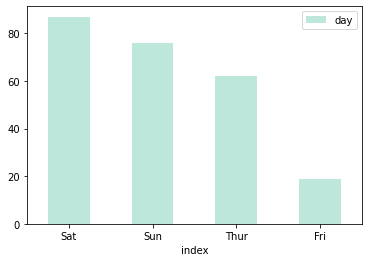

In [ ]:
a.plot(kind='bar',x='index',y='day',colormap='icefire')
plt.xticks(rotation=0)
plt.show()

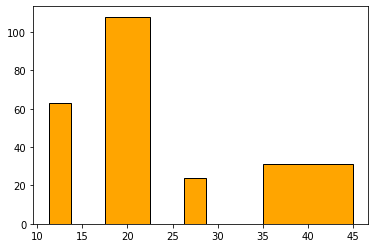

In [ ]:
plt.hist(tips['total_bill'],color='orange',bins=[10,15,25,30,50],edgecolor='black',rwidth=0.5)
plt.show()

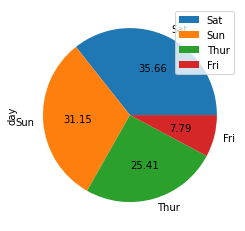

In [ ]:
a.plot(kind='pie',y='day',labels=a['index'],autopct='%1.2f')
plt.show()

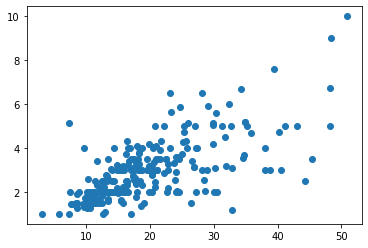

In [ ]:
plt.scatter(tips['total_bill'],tips['tip'])
plt.show()

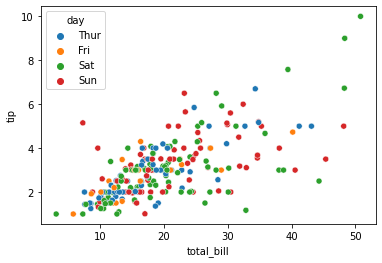

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='day')
plt.show()

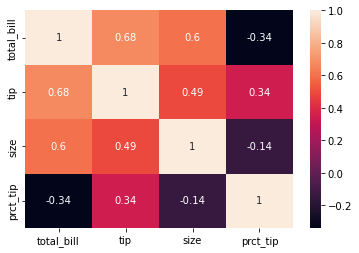

<Figure size 360x360 with 0 Axes>

In [ ]:
sns.heatmap(tips.corr(),annot=True)
plt.figure(figsize=(5,5))
plt.show()

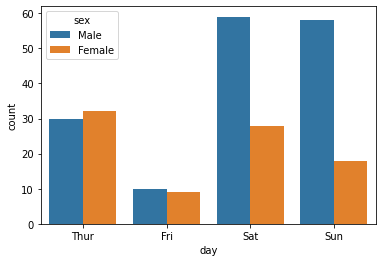

In [ ]:
sns.countplot(x='day',data=tips,hue='sex')
plt.show()

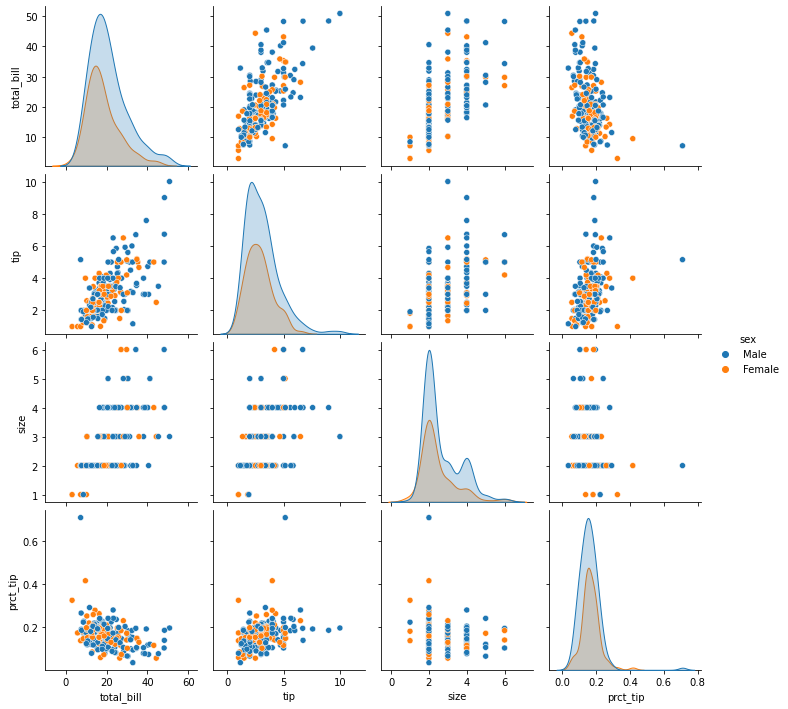

In [ ]:
sns.pairplot(data=tips,hue='sex')
plt.show()

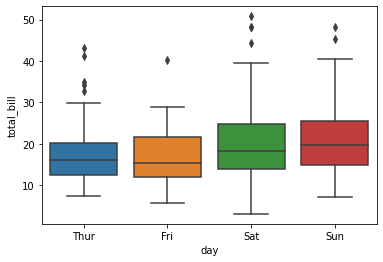

In [ ]:
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()

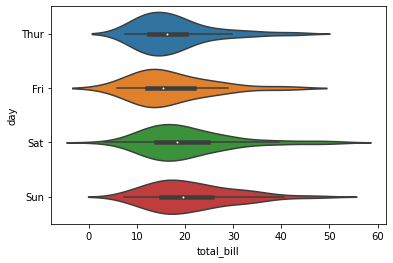

In [ ]:
sns.violinplot(y='day',x='total_bill',data=tips)
plt.show()

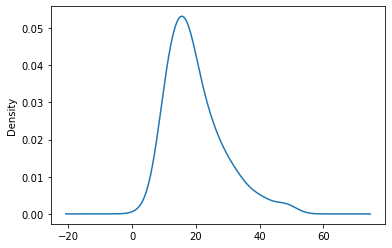

In [ ]:
tips['total_bill'].plot(kind='kde');
plt.show()

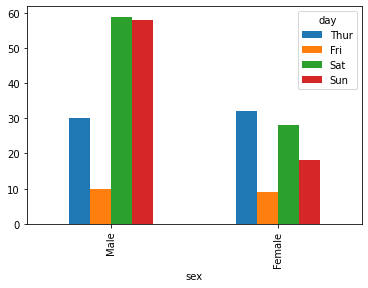

In [ ]:
pd.crosstab(tips['sex'],tips['day']).plot(kind='bar')
plt.show()

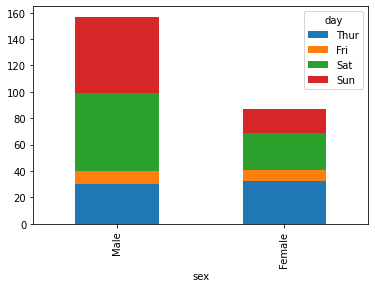

In [ ]:
pd.crosstab(tips['sex'],tips['day']).plot(kind='bar',stacked=True)
plt.show()